In [ ]:
#!pip install -U numpy matplotlib kececilayout networkx rustworkx igraph networkit graphillion

🚀 KEÇECİ LAYOUT - GELİŞMİŞ GÖRSELLEŞTİRME
Özellikler: Yönlü/Yönsüz graflar, Curved, Helix, 3D
Graphillion tam destek - sınırsız düğüm

KÜTÜPHANE DURUMU
NetworkX        ✓ KURULU
RustworkX       ✓ KURULU
igraph          ✓ KURULU
Networkit       ✓ KURULU
Graphillion     ✓ KURULU

KEÇECİ LAYOUT - GELİŞMİŞ MENÜ
1. Tekil Kütüphane Testi
2. Tüm Kütüphaneleri Karşılaştır
3. Stil Karşılaştırması
4. Kütüphane Durumunu Göster
0. Çıkış


Ana menü seçiminiz (0-4):  1



TEKİL KÜTÜPHANE TESTİ
1. NetworkX
2. RustworkX
3. igraph
4. Networkit
5. Graphillion
0. Ana Menüye Dön


Kütüphane seçin (0-5):  2



YÖN SEÇENEKLERİ
1. Yönsüz (Undirected) - Çift yönlü kenarlar
2. Yönlü (Directed)   - Ok uçlu kenarlar


Yön seçin (1-2, varsayılan: 1):  2



ÇİZİM STİLLERİ
1. Standard    - Düz kenarlar
2. Curved      - Kavisli kenarlar
3. Helix       - Sarmal düzen
4. 3D         - Üç boyutlu helix


Stil seçin (1-4, varsayılan: 1):  2



--- RustworkX Testi (Yönlü, CURVED stili) ---


Düğüm sayısı (varsayılan: 8):  
Primary spacing (varsayılan: 1.0):  
Secondary spacing (varsayılan: 0.6):  


Layout yönü seçin: 1.top_down 2.bottom_up 3.left-right 4.right-left


Seçim (1-4, varsayılan: 1):  


✓ RustworkX: 8 düğüm, 7 kenar
✓ Keçeci Layout başarılı: 8 düğüm


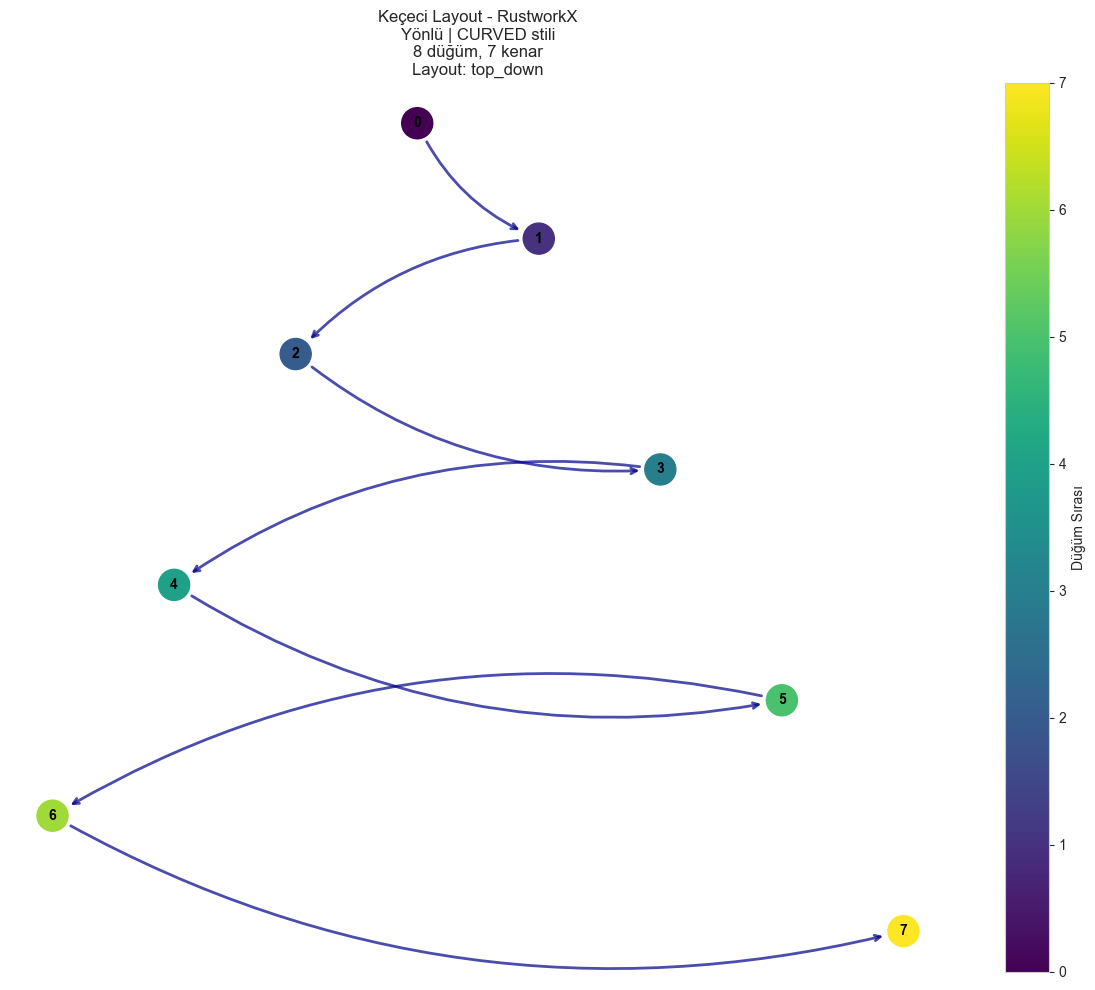


KEÇECİ LAYOUT - GELİŞMİŞ MENÜ
1. Tekil Kütüphane Testi
2. Tüm Kütüphaneleri Karşılaştır
3. Stil Karşılaştırması
4. Kütüphane Durumunu Göster
0. Çıkış


Ana menü seçiminiz (0-4):  0


Program sonlandırılıyor...


In [1]:
import kececilayout as kl
import networkx as nx
import rustworkx as rx
import igraph as ig
import networkit as nk

# Graphillion'u koşullu olarak import et
try:
    import graphillion as gg
    from graphillion import GraphSet
    import itertools
    GRAPHILLION_AVAILABLE = True
except ImportError:
    GRAPHILLION_AVAILABLE = False

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import warnings

def generate_sample_graph(library_type, n_nodes=10, directed=False):
    """Seçilen kütüphane tipine göre örnek graf oluşturur"""
    if library_type == 1:  # NetworkX
        if directed:
            G = nx.DiGraph()
            for i in range(n_nodes - 1):
                G.add_edge(i, i+1)
        else:
            G = nx.path_graph(n_nodes)
        print(f"✓ NetworkX: {G.number_of_nodes()} düğüm, {G.number_of_edges()} kenar")
        return G
    
    elif library_type == 2:  # RustworkX
        if directed:
            G = rx.PyDiGraph()
            nodes = G.add_nodes_from(range(n_nodes))
            for i in range(n_nodes - 1):
                G.add_edge(i, i+1, None)
        else:
            G = rx.generators.path_graph(n_nodes)
        print(f"✓ RustworkX: {G.num_nodes()} düğüm, {G.num_edges()} kenar")
        return G
    
    elif library_type == 3:  # igraph
        G = ig.Graph.Ring(n_nodes, directed=directed, circular=False)
        print(f"✓ igraph: {G.vcount()} düğüm, {G.ecount()} kenar")
        return G
    
    elif library_type == 4:  # Networkit
        if directed:
            G = nk.graph.Graph(n_nodes, weighted=False, directed=True)
        else:
            G = nk.graph.Graph(n_nodes, weighted=False, directed=False)
        for i in range(n_nodes - 1):
            G.addEdge(i, i+1)
        print(f"✓ Networkit: {G.numberOfNodes()} düğüm, {G.numberOfEdges()} kenar")
        return G
    
    elif library_type == 5:  # Graphillion - SİZİN KODUNUZA GÖRE
        if not GRAPHILLION_AVAILABLE:
            print("✗ Graphillion kullanılamıyor, NetworkX fallback kullanılıyor")
            return nx.path_graph(min(n_nodes, 5))
        
        try:
            # SİZİN KODUNUZDAKİ GİBİ Graphillion örneği
            universe = []
            for i in range(1, n_nodes): 
                universe.append((i, i + 1))
            GraphSet.set_universe(universe)
            gs = GraphSet()  # Boş GraphSet - sizin kodunuzdaki gibi
            
            print(f"✓ Graphillion: {n_nodes} düğüm evreni, {len(universe)} kenar")
            return gs
            
        except Exception as e:
            print(f"✗ Graphillion hatası: {e} - NetworkX fallback kullanılıyor")
            return nx.path_graph(min(n_nodes, 5))

def get_secondary_start(primary_direction):
    """Primary direction'a uygun secondary_start belirler"""
    if primary_direction in ['top_down', 'bottom_up']:
        return 'right'
    elif primary_direction in ['left-to-right', 'right-to-left']:
        return 'up'
    else:
        return 'right'

def convert_to_networkx(graph, library_type, directed=False):
    """Farklı kütüphane graflarını NetworkX'e dönüştürür - SİZİN KODUNUZA GÖRE"""
    if graph is None:
        if directed:
            return nx.DiGraph([(1, 2), (2, 3)])
        else:
            return nx.path_graph(3)
    
    try:
        if library_type == 1:  # NetworkX
            return graph
        
        elif library_type == 2:  # RustworkX to NetworkX
            if directed:
                nx_graph = nx.DiGraph()
            else:
                nx_graph = nx.Graph()
            nx_graph.add_nodes_from(graph.node_indices())
            if hasattr(graph, 'edge_list'):
                nx_graph.add_edges_from(graph.edge_list())
            return nx_graph
        
        elif library_type == 3:  # igraph to NetworkX
            if directed:
                nx_graph = nx.DiGraph()
            else:
                nx_graph = nx.Graph()
            nx_graph.add_nodes_from([v.index for v in graph.vs])
            nx_graph.add_edges_from(graph.get_edgelist())
            return nx_graph
        
        elif library_type == 4:  # Networkit to NetworkX
            if directed:
                nx_graph = nx.DiGraph()
            else:
                nx_graph = nx.Graph()
            n_nodes = graph.numberOfNodes()
            nx_graph.add_nodes_from(range(n_nodes))
            for u, v in graph.iterEdges():
                nx_graph.add_edge(u, v)
            return nx_graph
        
        elif library_type == 5:  # Graphillion to NetworkX - SİZİN KODUNUZA GÖRE
            if directed:
                nx_graph = nx.DiGraph()
            else:
                nx_graph = nx.Graph()
            try:
                # SİZİN KODUNUZDAKİ GİBİ universe'den kenarları al
                if hasattr(graph, 'universe'):
                    edges = list(graph.universe())
                else:
                    edges = []
                
                if edges:
                    all_nodes = set()
                    for edge in edges:
                        all_nodes.update(edge)
                    
                    # Tüm düğümleri ekle (1'den başlayarak)
                    nx_graph.add_nodes_from(sorted(all_nodes))
                    nx_graph.add_edges_from(edges)
                else:
                    # Universe'de kenar yoksa, basit bir path oluştur
                    if n_nodes > 1:
                        simple_edges = [(i, i+1) for i in range(1, min(n_nodes, 100))]
                        if simple_edges:
                            all_nodes = set()
                            for edge in simple_edges:
                                all_nodes.update(edge)
                            nx_graph.add_nodes_from(sorted(all_nodes))
                            nx_graph.add_edges_from(simple_edges)
                
                # Eğer hala boşsa, çok basit bir graf ekle
                if nx_graph.number_of_nodes() == 0:
                    nx_graph.add_edges_from([(1, 2), (2, 3)])
                
                print(f"✓ Graphillion dönüşüm: {nx_graph.number_of_nodes()} düğüm, {nx_graph.number_of_edges()} kenar")
                return nx_graph
                
            except Exception as e:
                print(f"✗ Graphillion dönüşüm hatası: {e} - Basit graf kullanılıyor")
                # Basit fallback
                simple_graph = nx.path_graph(5)
                if directed:
                    simple_graph = simple_graph.to_directed()
                return simple_graph
                
    except Exception as e:
        print(f"✗ Dönüşüm hatası: {e} - Basit graf kullanılıyor")
        if directed:
            return nx.DiGraph([(1, 2), (2, 3)])
        else:
            return nx.path_graph(3)

def safe_kececi_layout(nx_graph, layout_params):
    """Güvenli Keçeci Layout - Graphillion uyumlu"""
    try:
        # Grafı kontrol et
        if nx_graph.number_of_nodes() == 0:
            nx_graph = nx.path_graph(3)
        
        # Keçeci Layout'u dene
        pos = kl.kececi_layout(nx_graph, **layout_params)
        
        print(f"✓ Keçeci Layout başarılı: {len(pos)} düğüm")
        return pos
        
    except Exception as e:
        print(f"✗ Keçeci Layout hatası: {e} - Circular layout kullanılıyor")
        return nx.circular_layout(nx_graph)

def generate_3d_helix_layout(nx_graph, z_spacing=2.0, radius=5.0, turns=2.0):
    """3D helix layout oluşturur"""
    nodes = sorted(list(nx_graph.nodes()))
    pos_3d = {}
    total_nodes = len(nodes)
    
    if total_nodes == 0:
        return pos_3d
    
    total_angle = 2 * np.pi * turns
    for i, node_id in enumerate(nodes):
        z = i * z_spacing
        angle = (i / (total_nodes - 1)) * total_angle if total_nodes > 1 else 0
        x = np.cos(angle) * radius
        y = np.sin(angle) * radius
        pos_3d[node_id] = (x, y, z)
    
    return pos_3d

def draw_edges_with_arrows(nx_graph, pos, ax, edge_style='standard', directed=False):
    """Ok uçları ile kenar çizimi - uyarısız versiyon"""
    
    # Uyarıları geçici olarak kapat
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=UserWarning)
        
        if edge_style == 'curved' and directed:
            # Curved + arrows için FancyArrowPatch kullan
            for edge in nx_graph.edges():
                u, v = edge
                if u in pos and v in pos:
                    arrowprops = dict(
                        arrowstyle='->',
                        color='darkblue',
                        lw=2,
                        alpha=0.7,
                        shrinkA=15,
                        shrinkB=15,
                        connectionstyle='arc3,rad=0.2'
                    )
                    ax.annotate("", 
                               xy=pos[v], xycoords='data',
                               xytext=pos[u], textcoords='data',
                               arrowprops=arrowprops)
        
        elif edge_style == 'curved' and not directed:
            # Curved without arrows - FancyArrowPatch (ok ucu olmadan)
            for edge in nx_graph.edges():
                u, v = edge
                if u in pos and v in pos:
                    from matplotlib.patches import FancyArrowPatch
                    arrow = FancyArrowPatch(pos[u], pos[v],
                                          connectionstyle='arc3,rad=0.2',
                                          color='darkblue', alpha=0.7, lw=2,
                                          arrowstyle='-')  # Ok ucu olmadan
                    ax.add_patch(arrow)
        
        elif directed:
            # Düz ok uçları
            nx.draw_networkx_edges(
                nx_graph, pos,
                width=2,
                alpha=0.7,
                edge_color='darkred',
                arrows=True,
                arrowsize=20,
                arrowstyle='->',
                ax=ax
            )
        
        else:
            # Standart düz kenarlar
            nx.draw_networkx_edges(
                nx_graph, pos,
                width=2,
                alpha=0.7,
                edge_color='darkblue',
                arrows=False,
                ax=ax
            )

def plot_with_kececi_layout(graph, library_type, layout_params, ax, style='standard', directed=False):
    """Farklı stillerle Keçeci Layout çizimi - SİZİN KODUNUZA UYGUN"""
    
    # Uyarıları filtrele
    warnings.filterwarnings('ignore', category=UserWarning)
    
    nx_graph = convert_to_networkx(graph, library_type, directed)
    
    # Grafı güvence altına al
    if nx_graph.number_of_nodes() < 2:
        if directed:
            nx_graph = nx.DiGraph([(1, 2), (2, 3), (3, 4)])
        else:
            nx_graph = nx.path_graph(4)
    
    # Edge style belirle
    edge_style = 'standard'
    if style == 'curved':
        edge_style = 'curved'
    elif style == '3d':
        edge_style = 'standard'  # 3D için özel işlem
    
    if style == '3d':
        # 3D çizim
        pos_3d = generate_3d_helix_layout(nx_graph)
        node_colors = list(range(len(nx_graph.nodes())))
        
        for i, node_id in enumerate(sorted(nx_graph.nodes())):
            if node_id in pos_3d:
                x, y, z = pos_3d[node_id]
                ax.scatter([x], [y], [z], 
                          s=300, 
                          c=[node_colors[i]], 
                          cmap='viridis',
                          alpha=0.8,
                          depthshade=True)
                
                ax.text(x, y, z, f' {node_id}', fontsize=8, fontweight='bold')
        
        for u, v in nx_graph.edges():
            if u in pos_3d and v in pos_3d:
                x_vals = [pos_3d[u][0], pos_3d[v][0]]
                y_vals = [pos_3d[u][1], pos_3d[v][1]]
                z_vals = [pos_3d[u][2], pos_3d[v][2]]
                ax.plot(x_vals, y_vals, z_vals, 
                       color='blue', alpha=0.6, linewidth=2)
        
        scatter = ax.scatter([], [], [], c=[], cmap='viridis')
        return scatter, nx_graph, pos_3d
    
    elif style == 'helix':
        # Helix layout
        nodes = sorted(list(nx_graph.nodes()))
        pos = {}
        
        for i, node_id in enumerate(nodes):
            angle = i * (2 * np.pi / len(nodes))
            radius = 1.0 + (i * 0.3)
            x = radius * np.cos(angle)
            y = radius * np.sin(angle)
            pos[node_id] = (x, y)
    
    else:
        # Keçeci Layout - SİZİN KODUNUZDAKİ GİBİ
        primary_direction = layout_params.get('primary_direction', 'top_down')
        layout_params['secondary_start'] = get_secondary_start(primary_direction)
        
        pos = safe_kececi_layout(nx_graph, layout_params)
    
    # Düğümleri çiz
    node_colors = list(range(len(nx_graph.nodes())))
    nodes_viz = nx.draw_networkx_nodes(
        nx_graph, pos, 
        node_color=node_colors,
        node_size=500,
        cmap='viridis',
        ax=ax
    )
    
    # Kenarları çiz (ok uçları ile)
    draw_edges_with_arrows(nx_graph, pos, ax, edge_style, directed)
    
    # Etiketleri çiz
    nx.draw_networkx_labels(nx_graph, pos, font_size=10, font_weight='bold', ax=ax)
    
    return nodes_viz, nx_graph, pos

def plot_3d_graph(graph, library_type, layout_params, ax):
    """3D çizim"""
    nx_graph = convert_to_networkx(graph, library_type)
    
    if nx_graph.number_of_nodes() < 2:
        nx_graph = nx.path_graph(4)
    
    # 3D helix layout oluştur
    pos_3d = generate_3d_helix_layout(nx_graph)
    
    node_colors = list(range(len(nx_graph.nodes())))
    
    # 3D scatter plot for nodes
    for node_id, (x, y, z) in pos_3d.items():
        ax.scatter([x], [y], [z], 
                  s=300, 
                  c=[node_colors[node_id]], 
                  cmap='viridis',
                  alpha=0.8,
                  depthshade=True)
        
        # Node labels
        ax.text(x, y, z, f' {node_id}', fontsize=8, fontweight='bold')
    
    # 3D lines for edges
    for u, v in nx_graph.edges():
        if u in pos_3d and v in pos_3d:
            x_vals = [pos_3d[u][0], pos_3d[v][0]]
            y_vals = [pos_3d[u][1], pos_3d[v][1]]
            z_vals = [pos_3d[u][2], pos_3d[v][2]]
            ax.plot(x_vals, y_vals, z_vals, 
                   color='blue', alpha=0.6, linewidth=2)
    
    # Fake scatter for colorbar
    scatter = ax.scatter([], [], [], c=[], cmap='viridis')
    
    return scatter, nx_graph, pos_3d

def show_library_status():
    """Kütüphane durumlarını göster"""
    print("\n" + "="*50)
    print("KÜTÜPHANE DURUMU")
    print("="*50)
    
    libraries = [
        ("NetworkX", True),
        ("RustworkX", True), 
        ("igraph", True),
        ("Networkit", True),
        ("Graphillion", GRAPHILLION_AVAILABLE)
    ]
    
    for lib_name, available in libraries:
        status = "✓ KURULU" if available else "✗ KURULU DEĞİL"
        print(f"{lib_name:<15} {status}")

def show_style_options():
    """Çizim stillerini göster"""
    print("\n" + "="*40)
    print("ÇİZİM STİLLERİ")
    print("="*40)
    print("1. Standard    - Düz kenarlar")
    print("2. Curved      - Kavisli kenarlar") 
    print("3. Helix       - Sarmal düzen")
    print("4. 3D         - Üç boyutlu helix")
    print("="*40)

def show_direction_options():
    """Yön seçeneklerini göster"""
    print("\n" + "="*40)
    print("YÖN SEÇENEKLERİ")
    print("="*40)
    print("1. Yönsüz (Undirected) - Çift yönlü kenarlar")
    print("2. Yönlü (Directed)   - Ok uçlu kenarlar")
    print("="*40)

def interactive_graph_menu():
    """Interaktif graf kütüphanesi seçim menüsü"""
    
    while True:
        print("\n" + "="*60)
        print("KEÇECİ LAYOUT - GELİŞMİŞ MENÜ")
        print("="*60)
        print("1. Tekil Kütüphane Testi")
        print("2. Tüm Kütüphaneleri Karşılaştır")
        print("3. Stil Karşılaştırması")
        print("4. Kütüphane Durumunu Göster")
        print("0. Çıkış")
        print("="*60)
        
        try:
            main_choice = int(input("Ana menü seçiminiz (0-4): "))
            
            if main_choice == 0:
                print("Program sonlandırılıyor...")
                break
            elif main_choice == 1:
                single_library_test()
            elif main_choice == 2:
                compare_all_libraries()
            elif main_choice == 3:
                compare_styles()
            elif main_choice == 4:
                show_library_status()
            else:
                print("Geçersiz seçim! Lütfen 0-4 arası bir sayı girin.")
                
        except ValueError:
            print("Lütfen geçerli bir sayı girin!")

def single_library_test():
    """Tekil kütüphane testi - SİZİN KODUNUZA UYGUN (SINIR YOK)"""
    print("\n" + "="*50)
    print("TEKİL KÜTÜPHANE TESTİ")
    print("="*50)
    print("1. NetworkX")
    print("2. RustworkX")
    print("3. igraph")
    print("4. Networkit")
    
    if GRAPHILLION_AVAILABLE:
        print("5. Graphillion")
        max_choice = 5
    else:
        print("5. Graphillion (Kullanılamıyor)")
        max_choice = 4
    
    print("0. Ana Menüye Dön")
    
    try:
        choice = int(input(f"Kütüphane seçin (0-{max_choice}): "))
        
        if choice == 0:
            return
        elif choice in [1, 2, 3, 4, 5]:
            if choice == 5 and not GRAPHILLION_AVAILABLE:
                print("Graphillion kullanılamıyor!")
                return
            
            # SİZİN KODUNUZDAKİ GİBİ - SINIR YOK
            default_nodes = 8
            
            # Yön seçimi
            show_direction_options()
            dir_choice = int(input("Yön seçin (1-2, varsayılan: 1): ") or 1)
            directed = (dir_choice == 2)
            
            # Stil seçimi
            show_style_options()
            style_choice = int(input("Stil seçin (1-4, varsayılan: 1): ") or 1)
            styles = ['standard', 'curved', 'helix', '3d']
            selected_style = styles[style_choice - 1] if 1 <= style_choice <= 4 else 'standard'
            
            library_names = {
                1: 'NetworkX', 2: 'RustworkX', 3: 'igraph', 
                4: 'Networkit', 5: 'Graphillion'
            }
            
            direction_text = "Yönlü" if directed else "Yönsüz"
            print(f"\n--- {library_names[choice]} Testi ({direction_text}, {selected_style.upper()} stili) ---")
            
            # Parametreleri al - SİZİN KODUNUZDAKİ GİBİ SINIR YOK
            n_nodes = int(input(f"Düğüm sayısı (varsayılan: {default_nodes}): ") or default_nodes)
            
            primary_spacing = float(input("Primary spacing (varsayılan: 1.0): ") or 1.0)
            secondary_spacing = float(input("Secondary spacing (varsayılan: 0.6): ") or 0.6)
            
            if selected_style != '3d':
                print("Layout yönü seçin: 1.top_down 2.bottom_up 3.left-right 4.right-left")
                dir_choice = int(input("Seçim (1-4, varsayılan: 1): ") or 1)
                directions = ['top_down', 'bottom_up', 'left-to-right', 'right-to-left']
                primary_direction = directions[dir_choice - 1] if 1 <= dir_choice <= 4 else 'top_down'
            else:
                primary_direction = 'top_down'
            
            layout_params = {
                'primary_spacing': primary_spacing,
                'secondary_spacing': secondary_spacing,
                'primary_direction': primary_direction,
                'expanding': True
            }
            
            # Grafı oluştur ve çiz
            graph = generate_sample_graph(choice, n_nodes, directed)
            
            if selected_style == '3d':
                fig = plt.figure(figsize=(12, 10))
                ax = fig.add_subplot(111, projection='3d')
            else:
                fig, ax = plt.subplots(figsize=(12, 10))
            
            nodes, nx_graph, pos = plot_with_kececi_layout(
                graph, choice, layout_params, ax, selected_style, directed
            )
            
            if nodes is not None and selected_style != '3d':
                plt.colorbar(nodes, ax=ax, label='Düğüm Sırası')
            elif selected_style == '3d':
                plt.colorbar(nodes, ax=ax, label='Düğüm Sırası')
            
            title = f'Keçeci Layout - {library_names[choice]}\n'
            title += f'{direction_text} | {selected_style.upper()} stili\n'
            title += f'{nx_graph.number_of_nodes()} düğüm, {nx_graph.number_of_edges()} kenar'
            
            if selected_style != '3d':
                title += f'\nLayout: {primary_direction}'
            
            ax.set_title(title, fontsize=12)
            
            if selected_style != '3d':
                ax.axis('off')
            else:
                ax.set_xlabel('X')
                ax.set_ylabel('Y')
                ax.set_zlabel('Z')
            
            plt.tight_layout()
            plt.show()
            
        else:
            print(f"Geçersiz seçim! Lütfen 0-{max_choice} arası bir sayı girin.")
            
    except ValueError:
        print("Lütfen geçerli bir sayı girin!")
    except Exception as e:
        print(f"Hata: {e}")

def compare_directed_undirected():
    """Yönlü ve yönsüz grafları karşılaştır"""
    print("\nYönlü/Yönsüz karşılaştırması yapılıyor...")
    
    library_type = 1  # NetworkX kullan
    n_nodes = 6
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    layout_params = {
        'primary_spacing': 1.0,
        'secondary_spacing': 0.6,
        'primary_direction': 'top_down',
        'expanding': True
    }
    
    # Yönsüz graf
    undirected_graph = generate_sample_graph(library_type, n_nodes, directed=False)
    nodes_undir, nx_graph_undir, pos_undir = plot_with_kececi_layout(
        undirected_graph, library_type, layout_params, axes[0], 'standard', False
    )
    axes[0].set_title('Yönsüz Graf (Undirected)\nÇift yönlü kenarlar', 
                     fontsize=14, fontweight='bold')
    axes[0].axis('off')
    
    # Yönlü graf
    directed_graph = generate_sample_graph(library_type, n_nodes, directed=True)
    nodes_dir, nx_graph_dir, pos_dir = plot_with_kececi_layout(
        directed_graph, library_type, layout_params, axes[1], 'standard', True
    )
    axes[1].set_title('Yönlü Graf (Directed)\nOk uçlu kenarlar', 
                     fontsize=14, fontweight='bold')
    axes[1].axis('off')
    
    plt.suptitle('YÖNLÜ ve YÖNSÜZ GRAFLARIN KARŞILAŞTIRILMASI', 
                 fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

def compare_styles():
    #Farklı stilleri karşılaştır
    print("\nStil karşılaştırması yapılıyor...")
    
    library_type = 1  # NetworkX kullan
    n_nodes = 6
    graph = generate_sample_graph(library_type, n_nodes)
    
    styles = ['standard', 'curved', 'helix', '3d']
    style_names = ['Standard', 'Curved', 'Helix', '3D']
    
    fig = plt.figure(figsize=(20, 16))
    
    layout_params = {
        'primary_spacing': 1.0,
        'secondary_spacing': 0.6,
        'primary_direction': 'top_down',
        'expanding': True
    }
    
    for idx, (style, style_name) in enumerate(zip(styles, style_names)):
        if style == '3d':
            ax = fig.add_subplot(2, 2, idx+1, projection='3d')
        else:
            ax = fig.add_subplot(2, 2, idx+1)
        
        try:
            nodes, nx_graph, pos = plot_with_kececi_layout(graph, library_type, layout_params, ax, style)
            
            ax.set_title(f'{style_name} Stil\n{nx_graph.number_of_nodes()} düğüm', 
                        fontsize=14, fontweight='bold')
            
            if style != '3d':
                ax.axis('off')
            else:
                ax.set_xlabel('X')
                ax.set_ylabel('Y')
                ax.set_zlabel('Z')
                
        except Exception as e:
            print(f"{style_name} stili için hata: {e}")
            ax.clear()
            ax.text(0.5, 0.5, f'{style_name}\nHATA', ha='center', va='center', 
                   fontsize=12, color='red', weight='bold')
            ax.set_title(f'{style_name} - Hata', fontsize=12)
            if style != '3d':
                ax.axis('off')
    
    plt.suptitle('KEÇECİ LAYOUT - STİL KARŞILAŞTIRMASI', 
                 fontsize=18, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()

def compare_all_libraries():
    #Tüm kütüphaneleri karşılaştır
    print("\nTüm kütüphaneler karşılaştırılıyor...")
    
    libraries = []
    if GRAPHILLION_AVAILABLE:
        libraries = [(1, 'NetworkX'), (2, 'RustworkX'), (3, 'igraph'), (4, 'Networkit'), (5, 'Graphillion')]
    else:
        libraries = [(1, 'NetworkX'), (2, 'RustworkX'), (3, 'igraph'), (4, 'Networkit')]
    
    n_nodes = 6
    layout_params = {
        'primary_spacing': 1.0,
        'secondary_spacing': 0.6,
        'primary_direction': 'top_down',
        'expanding': True
    }
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    successful_plots = 0
    
    for idx, (lib_type, lib_name) in enumerate(libraries):
        if idx >= len(axes):
            break
            
        try:
            ax = axes[idx]
            print(f"{lib_name}...", end=" ")
            graph = generate_sample_graph(lib_type, n_nodes)
            
            nodes, nx_graph, pos = plot_with_kececi_layout(graph, lib_type, layout_params, ax)
            
            ax.set_title(f'{lib_name}\n{nx_graph.number_of_nodes()} düğüm', fontsize=12, fontweight='bold')
            ax.axis('off')
            successful_plots += 1
            print("✓")
            
        except Exception as e:
            print(f"✗ ({e})")
            axes[idx].clear()  
            axes[idx].text(0.5, 0.5, f'{lib_name}\nHATA', ha='center', va='center', 
                          fontsize=10, color='red', weight='bold')
            axes[idx].set_title(f'{lib_name} - Hata', fontsize=10)
            axes[idx].axis('off')
    
    for idx in range(len(libraries), len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle(f'KEÇECİ LAYOUT - TÜM KÜTÜPHANELER\n{successful_plots}/{len(libraries)} başarılı', 
                 fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()

# Ana program
if __name__ == "__main__":
    print("🚀 KEÇECİ LAYOUT - GELİŞMİŞ GÖRSELLEŞTİRME")
    print("="*60)
    print("Özellikler: Yönlü/Yönsüz graflar, Curved, Helix, 3D")
    print("Graphillion tam destek - sınırsız düğüm")
    show_library_status()
    interactive_graph_menu()